In [36]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pandas as pd
import os
import glob
import re
import pickle
from matplotlib import pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors, linear_model, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, LeavePOut, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# import private libraries with a dumb hack
import sys
sys.path.append("..")
from src import generate_features, utils, vision

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tuning hyper-parameter

Best parameters set found on development set:

{'fit_prior': True}

Grid scores on development set:

0.375 (+/-0.337) for {'fit_prior': True}
0.357 (+/-0.277) for {'fit_prior': False}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



/Users/zachwener/miniconda3/envs/cs229-project/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


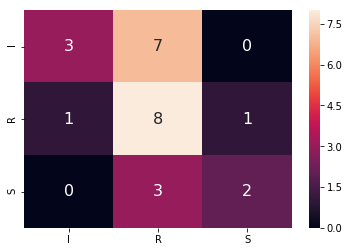

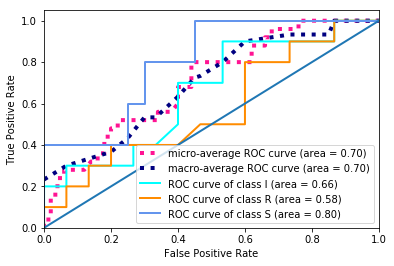


This is the classification report for the eval set:
              precision    recall  f1-score   support

           I       0.75      0.30      0.43        10
           R       0.44      0.80      0.57        10
           S       0.67      0.40      0.50         5

   micro avg       0.52      0.52      0.52        25
   macro avg       0.62      0.50      0.50        25
weighted avg       0.61      0.52      0.50        25

This is the classification report for the training set:
              precision    recall  f1-score   support

           I       0.90      0.78      0.84        23
           R       0.74      1.00      0.85        23
           S       0.80      0.40      0.53        10

   micro avg       0.80      0.80      0.80        56
   macro avg       0.81      0.73      0.74        56
weighted avg       0.82      0.80      0.79        56



BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

In [43]:
# let's try doing orb 50 multinomial naive bayes
train_bp, train_ap, train_labels = generate_features.train_paths_and_labels()
bp, ap, labels = generate_features.augment(train_bp, train_ap, train_labels)
X = pickle.load(open('./bow_datasets/surf-50', 'rb'))
nb = MultinomialNB()
cv = StratifiedKFold(n_splits=5)
params = {'fit_prior': [True, False]}
search = GridSearchCV(BernoulliNB(binarize=0.1), cv=cv, param_grid=params)
#nb.fit(X=X, y=labels)
labels
best_params = utils.do_CV(X, labels, search, multi_class=True)
best_params

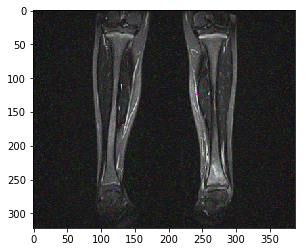

In [170]:
img = cv2.imread('../' + bp[4])
noisey = vision.add_noise(img)
x, y, z = img.shape
x *= 1.3
y *= 1.1
x = round(x)
y = round(y)
plt.imshow(vision.add_noise(img))

In [75]:
cv2.randn(zeros, 0, np.identity(1) * 1)

array([[-0.12024992, -0.10338049, -0.13543279, -0.17905535, -0.16849533],
       [ 0.11413741,  0.77350694,  0.60702431, -0.3894681 ,  0.57690305],
       [ 0.77692527, -0.30838272, -0.908162  , -1.2367276 ,  0.7283929 ],
       [ 0.27632338, -0.60397243, -0.88612133,  0.06749038,  0.03001522],
       [-1.31068504,  1.10676873,  0.72200811,  1.26957417, -1.15400088]])

In [132]:
before_paths

NameError: name 'before_paths' is not defined

In [135]:
bp, ap, l = generate_features.train_paths_and_labels()
df = pd.DataFrame({'bp': bp, 'ap': ap, 'y': l})

In [137]:
y = df['y']

In [153]:
#df = df.drop(columns='y')
train_test_split(df, y, test_size=0.3, stratify=y)
for row in df.iterrows():
    print(row[1][1])

IndexError: index out of bounds